In [24]:
import pandas as pd
import numpy as np
import math

In [25]:
#import the contiguity matrix into the python
#csv
data = pd.read_excel(r"D:\Thesis (3rd and 4th years)\HDI_data\HDI_dimensions_cleaned.xlsx")

data['year']=data['year'].astype(str)
data['year'].dtype

dtype('O')

In [26]:
#geometric mean for education

data['Edu_gm'] = (data['ME']*data['EE'])**(1/2)

data

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm
0,AF,2002,Afghanistan,6.5,56.6,1061,2.3,3.866523
1,AF,2003,Afghanistan,6.8,57.3,1098,2.4,4.039802
2,AF,2004,Afghanistan,7.9,57.9,1064,2.5,4.444097
3,AF,2005,Afghanistan,8.1,58.5,1138,2.6,4.589118
4,AF,2006,Afghanistan,8.4,59.1,1168,2.7,4.762352
...,...,...,...,...,...,...,...,...
3473,ZW,2014,Zimbabwe,10.3,59.4,1701,8.2,9.190212
3474,ZW,2015,Zimbabwe,10.3,60.4,1678,8.2,9.190212
3475,ZW,2016,Zimbabwe,10.3,61.2,1677,8.2,9.190212
3476,ZW,2017,Zimbabwe,10.3,61.7,1683,8.2,9.190212


In [27]:
#taking the yearly data

data_2018=data.loc[data.loc[:,'year']==str(2018), : ]

data_2018

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm
16,AF,2018,Afghanistan,10.1,64.5,1746,3.9,6.276145
35,AL,2018,Albania,15.2,78.5,12300,10.1,12.390319
54,DZ,2018,Algeria,14.7,76.7,13639,8.0,10.844353
73,AD,2018,Andorra,13.3,81.8,48641,10.2,11.647317
92,AO,2018,Angola,11.8,60.8,5555,5.1,7.757577
...,...,...,...,...,...,...,...,...
3401,VE,2018,Venezuela (Bolivarian Republic of),12.8,72.1,9070,10.3,11.482160
3420,VN,2018,Viet Nam,12.7,75.3,6220,8.2,10.204901
3439,YE,2018,Yemen,8.7,66.1,1433,3.2,5.276362
3458,ZM,2018,Zambia,12.1,63.5,3582,7.1,9.268765


In [28]:
len(data_2018['Country'])


188

In [29]:
#setting the frontiers for three criteria


def fast_non_dominated_sort(c1, c2, c3):
    S=[[] for i in range(0, len(c1))]
    front = [[]]
    n=[0 for i in range(0, len(c1))]
    rank = [0 for i in range(0, len(c1))]

    for p in range(0, len(c1)):
        #if corr1 <=0.90 and corr2 <=0.90 and corr3 <=0.90:
        S[p]=[]
        n[p]=0
        for q in range(0, len(c1)):
            if (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] >= c1[q] and c2[p] > c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] >= c2[q] and c3[p] > c3[q]) or (c1[p] > c1[q] and c2[p] > c2[q] and c3[p] >= c3[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] >= c1[p] and c2[q] > c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] >= c2[p] and c3[q] > c3[p]) or (c1[q] > c1[p] and c2[q] > c2[p] and c3[q] >= c3[p]):
                n[p] += 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list





In [30]:

Education=list(data_2018['Edu_gm'])
Health=list(data_2018['HE'])
Income=list(data_2018['GNI'])

frontiers_2018 = fast_non_dominated_sort(Education[:], Health[:], Income[:])

frontiers_2018

[[8, 46, 64, 74, 76, 81, 99, 126, 138, 152, 162, 163],
 [85, 59, 122, 121, 179, 24, 101, 177, 16, 31, 82, 90],
 [60, 83, 158, 9, 91, 3, 147, 178, 66, 107],
 [12, 100, 127, 154, 44, 137],
 [45, 34, 40],
 [55, 153, 14, 43],
 [94, 136, 11, 171, 95, 105],
 [1, 6, 15, 42, 63, 75, 87, 104, 129, 140, 173],
 [115, 131, 180, 25, 79, 139, 150, 142, 5],
 [149, 159, 48, 2, 21, 36, 176, 110, 111, 167],
 [7, 23, 58, 67, 50, 134, 170, 10, 53, 22, 174, 35, 49],
 [108,
  92,
  113,
  114,
  156,
  181,
  17,
  84,
  145,
  183,
  86,
  143,
  135,
  144,
  161,
  61,
  80,
  133,
  172],
 [20, 130, 78, 98, 52, 116, 184],
 [165, 71, 51, 28, 68, 73, 123],
 [19, 77, 89, 119, 168, 13, 65, 146, 155, 182],
 [38, 93, 112, 56, 29, 120, 164],
 [4, 118, 128, 88, 102, 186, 187, 125, 148, 141],
 [41, 132, 47, 109, 160, 37, 166, 30, 175, 185],
 [57, 72, 103, 0, 18, 69, 96, 39, 169],
 [54, 97, 62, 106, 70, 151],
 [26, 124, 27, 117, 33, 157],
 [32]]

In [31]:
frontiers_with_name = []
index_of_countries = []

for i in frontiers_2018:
    front=[]
    index=[]
    for j in i:
        cntry = data_2018['Country'].iloc[j]
        front.append(cntry)
        idx=data_2018.index[data_2018['Country'] == cntry][0]
        index.append(idx)
    frontiers_with_name.append(front)
    index_of_countries.append(index)
index_of_countries
frontiers_with_name

[['Australia',
  'Denmark',
  'Germany',
  'Hong Kong, China (SAR)',
  'Iceland',
  'Ireland',
  'Liechtenstein',
  'Norway',
  'Qatar',
  'Singapore',
  'Sweden',
  'Switzerland'],
 ['Japan',
  'Finland',
  'New Zealand',
  'Netherlands',
  'United States',
  'Brunei Darussalam',
  'Luxembourg',
  'United Arab Emirates',
  'Belgium',
  'Canada',
  'Israel',
  'Korea (Republic of)'],
 ['France',
  'Italy',
  'Spain',
  'Austria',
  'Kuwait',
  'Andorra',
  'Saudi Arabia',
  'United Kingdom',
  'Greece',
  'Malta'],
 ['Bahrain', 'Lithuania', 'Oman', 'Slovenia', 'Cyprus', 'Portugal'],
 ['Czechia', 'Chile', 'Costa Rica'],
 ['Estonia', 'Slovakia', 'Barbados', 'Cuba'],
 ['Latvia', 'Poland', 'Bahamas', 'Trinidad and Tobago', 'Lebanon', 'Maldives'],
 ['Albania',
  'Argentina',
  'Belarus',
  'Croatia',
  'Georgia',
  'Hungary',
  'Kazakhstan',
  'Malaysia',
  'Palau',
  'Russian Federation',
  'Turkey'],
 ['Montenegro',
  'Panama',
  'Uruguay',
  'Bulgaria',
  'Iran (Islamic Republic of)',
  

In [32]:
frontiers_2018_df=pd.DataFrame(frontiers_with_name)

frontiers_2018_df.to_excel((r'D:\Thesis (3rd and 4th years)\paper2&paper3\python\new_results_revision_SPES\FrontierSet_2018.xlsx'))


In [33]:
data_2018['frontier'] = None


C:\Users\Goksu Ozturk\AppData\Local\Temp\ipykernel_21916\4217094786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['frontier'] = None


In [34]:
for i in range(len(index_of_countries)):
    numbers = list(range(1, len(index_of_countries)+1))
    numbers.reverse()
    for indx in index_of_countries[i]:    
        data_2018.loc[indx, 'frontier'] = numbers[i]   

data_2018

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm,frontier
16,AF,2018,Afghanistan,10.1,64.5,1746,3.9,6.276145,4
35,AL,2018,Albania,15.2,78.5,12300,10.1,12.390319,15
54,DZ,2018,Algeria,14.7,76.7,13639,8.0,10.844353,13
73,AD,2018,Andorra,13.3,81.8,48641,10.2,11.647317,20
92,AO,2018,Angola,11.8,60.8,5555,5.1,7.757577,6
...,...,...,...,...,...,...,...,...,...
3401,VE,2018,Venezuela (Bolivarian Republic of),12.8,72.1,9070,10.3,11.482160,11
3420,VN,2018,Viet Nam,12.7,75.3,6220,8.2,10.204901,10
3439,YE,2018,Yemen,8.7,66.1,1433,3.2,5.276362,5
3458,ZM,2018,Zambia,12.1,63.5,3582,7.1,9.268765,6


In [35]:

data_2018_df=pd.DataFrame(data_2018)

data_2018_df.to_excel((r'D:\Thesis (3rd and 4th years)\paper2&paper3\python\new_results_revision_SPES\Data_2018.xlsx'))

In [36]:

# Plot progress
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.cm as cm
#xs = function1
#ys = function2
#zs = function3





In [37]:
edu=[]
hea=[]
inc=[]
for i in frontiers_2018[0]:
    eu=[Education[i]]
    ha = [Health[i]]
    ic=[Income[i]]
    edu.append(eu)
    hea.append(ha)
    inc.append(ic)

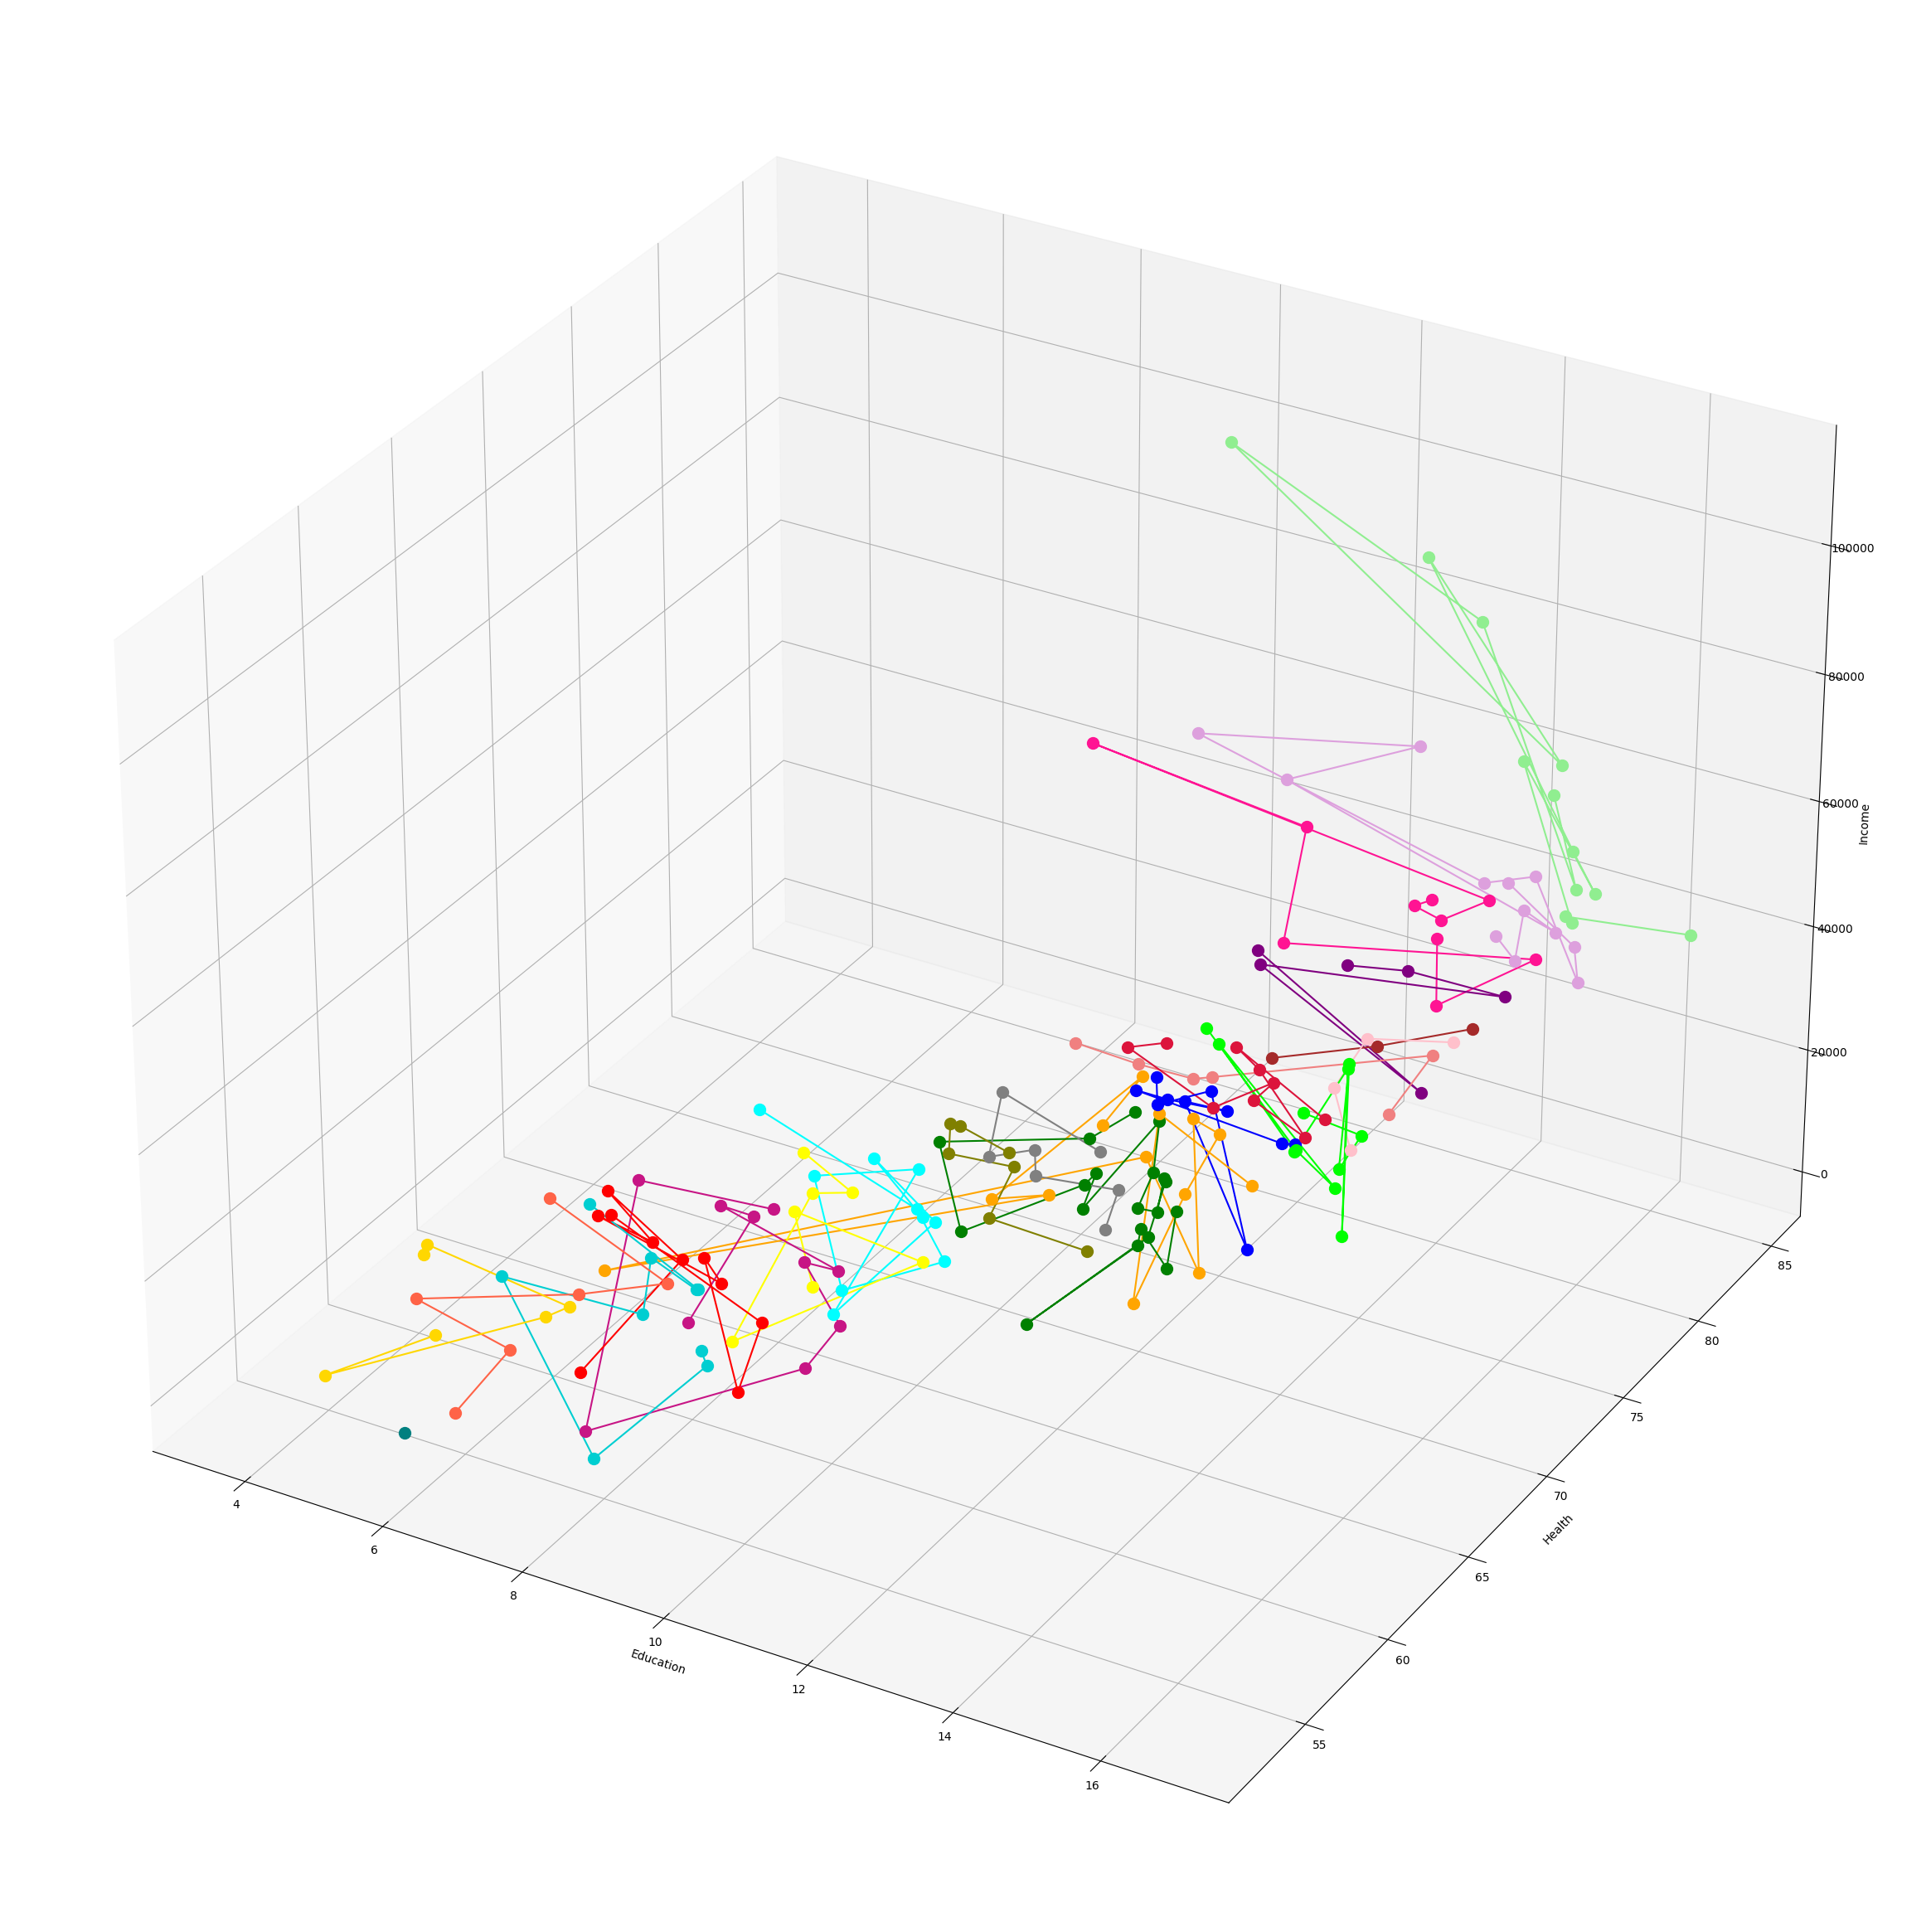

In [38]:

#visualization
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')

#colors = cm.rainbow(np.linspace(0, 1, len(frontiers_2018)))
colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']


for l in range(len(frontiers_2018)):
    col = colors[l]
    edu=[]
    hea=[]
    inc=[]
    for point in frontiers_2018[l]:
        eu=Education[point]
        ha = Health[point]
        ic=Income[point]
        edu.append(eu)
        hea.append(ha)
        inc.append(ic)
        ax.scatter(Education[point], Health[point], Income[point], s=100, color=col)
    ax.plot3D(edu, hea, inc, color=col)



ax.set_xlabel('Education')
ax.set_ylabel('Health')
ax.set_zlabel('Income')


plt.show()

In [39]:
# before insert the data, sort it according to country name from A to Z. 

ranking = pd.read_excel(r"D:\Thesis (3rd and 4th years)\paper2&paper3\python\new_results_revision_SPES\DataAndResults_2018.xlsx")

ranking['year']=ranking['year'].astype(str)
ranking['year'].dtype

Projection = ranking['proposedHDI_score']

Projection[0]

76.97245788574219

In [40]:
ranking

,cntry,year,Country,EE,HE,GNI,ME,Edu_gm,frontier,HDI_score,HDI_rank,log_GNI,proposedHDI_score,proposedHDI_frontier_rank,proposedHDI_rank
0,AF,2018,Afghanistan,10.1,64.5,1746,3.9,6.276145,4,0.496,169,7.465083,76.972458,4,169
1,AL,2018,Albania,15.2,78.5,12300,10.1,12.390319,15,0.791,69,9.417355,101.266243,10,70
2,DZ,2018,Algeria,14.7,76.7,13639,8.0,10.844353,13,0.759,82,9.520689,98.966469,8,80
3,AD,2018,Andorra,13.3,81.8,48641,10.2,11.647317,20,0.857,36,10.792222,108.841164,7,32
4,AO,2018,Angola,11.8,60.8,5555,5.1,7.757577,6,0.574,148,8.622454,82.780876,5,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,VE,2018,Venezuela (Bolivarian Republic of),12.8,72.1,9070,10.3,11.482160,11,0.726,95,9.112727,95.452881,9,101
184,VN,2018,Viet Nam,12.7,75.3,6220,8.2,10.204901,10,0.693,117,8.735525,93.552803,3,115
185,YE,2018,Yemen,8.7,66.1,1433,3.2,5.276362,5,0.463,176,7.267525,75.527176,10,173
186,ZM,2018,Zambia,12.1,63.5,3582,7.1,9.268765,6,0.591,142,8.183677,83.804306,3,147


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

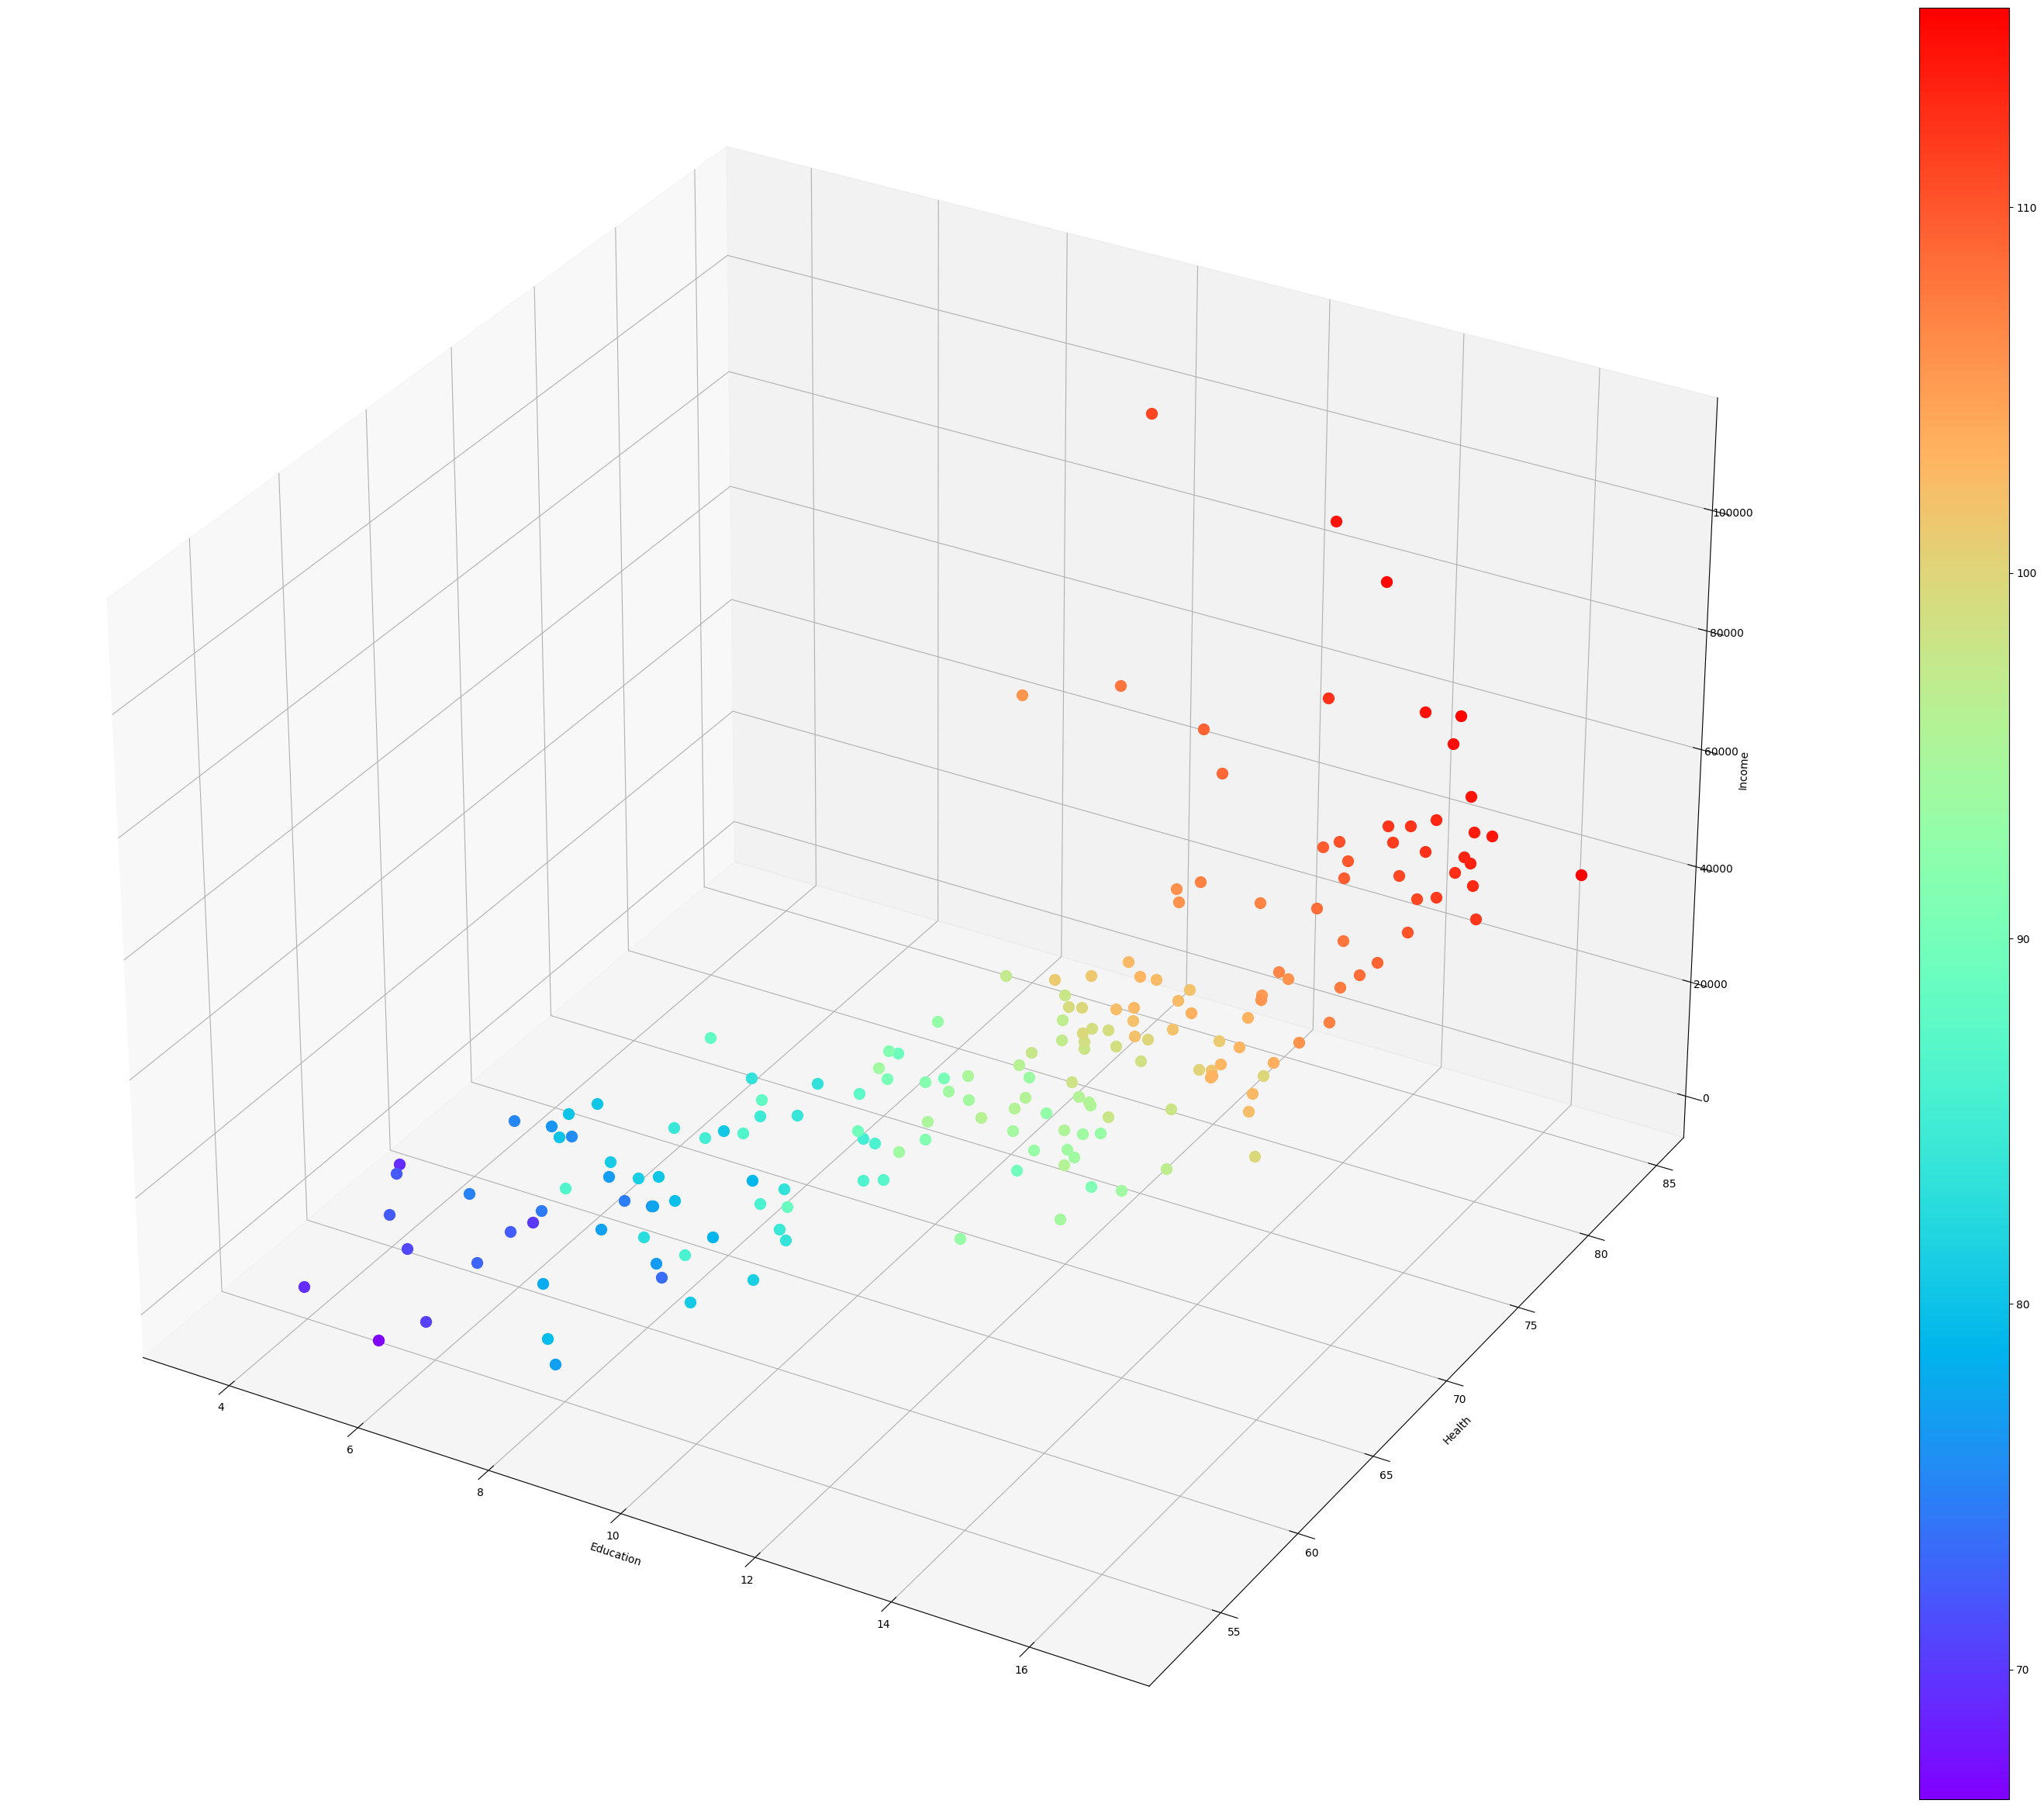

In [41]:
import matplotlib.colors
#visualization
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(frontiers_2018)))
#colors = ['lightgreen', 'plum', 'deeppink', 'purple', 'brown', 'pink', 'lightcoral', 'lime', 'crimson','blue', 'orange', 'green', 'gray', 'olive', 'cyan', 'yellow', 'mediumvioletred', 'red', 'darkturquoise', 'tomato', 'gold', 'teal', 'indigo', 'lightsteelblue', 'tan', 'aquamarine', 'lawngreen', 'fuchsia', 'bisque', 'seagreen']
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(Projection), vmax=max(Projection))

for l in range(len(frontiers_2018)):
    for point in frontiers_2018[l]:
        ax.scatter(Education[point], Health[point], Income[point], s=100, c=cmap(norm(Projection[point])))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)


ax.set_xlabel('Education')
ax.set_ylabel('Health')
ax.set_zlabel('Income')

plt.show()

In [42]:
#Correlation between HDI and my model

from scipy import stats

In [43]:
#ranking_2018=ranking.loc[ranking.loc[:,'Year']==str(2018), : ]

corr_2018=stats.spearmanr(ranking['HDI_rank'], ranking['proposedHDI_rank'])

corr_2018

SignificanceResult(statistic=0.9969586146337603, pvalue=4.244989851501924e-208)

In [44]:
countries=[]
for i in range(len(ranking['Country'])):
    c=ranking['Country'].iloc[i]
    countries.append(c)


HDI=[]
for j in range(len(ranking['HDI_rank'])):
    h=int(ranking['HDI_rank'].iloc[j])
    HDI.append(h)

MULT=[]
for k in range(len(ranking['proposedHDI_rank'])):
    m=int(ranking['proposedHDI_rank'].iloc[k])
    MULT.append(m)

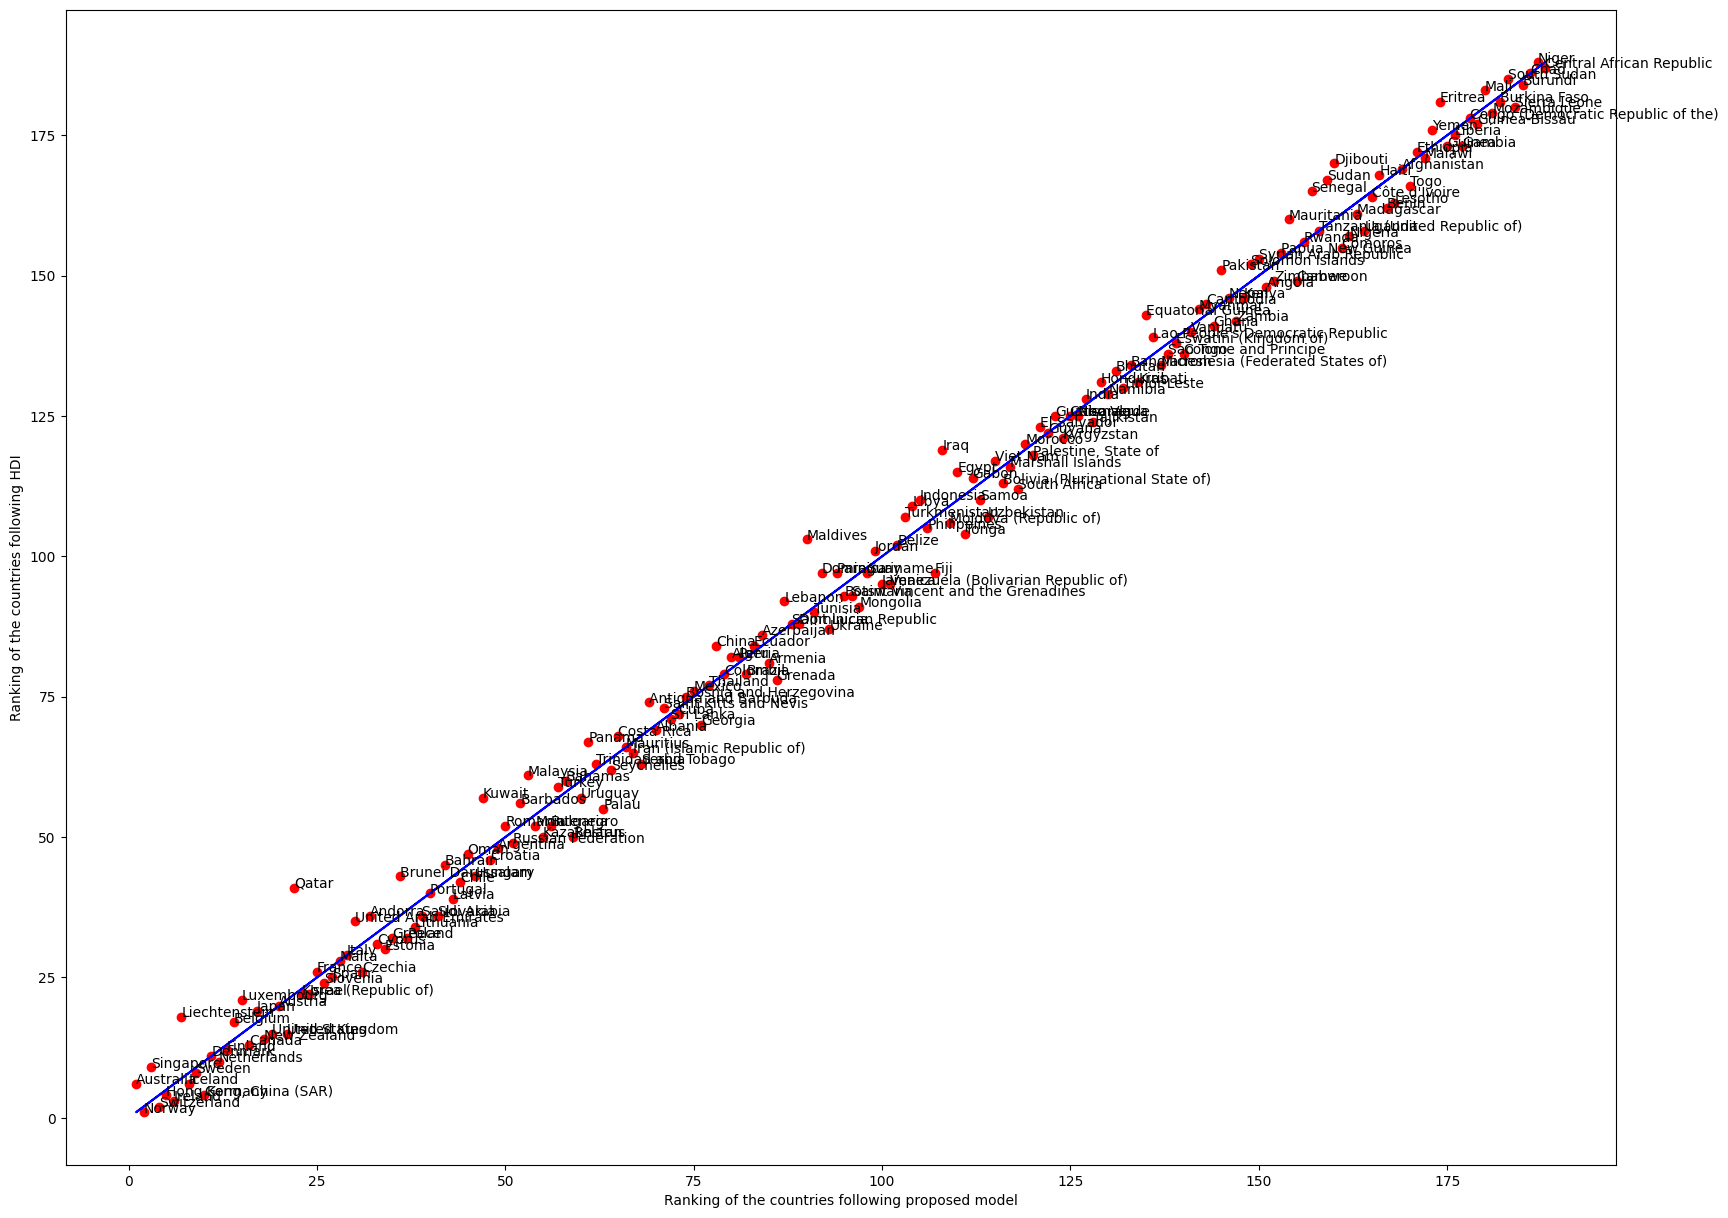

In [45]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 15))

plt.plot(ranking['HDI_rank'], ranking['HDI_rank'], c='b')
for o in range(len(countries)): 
    plt.scatter(MULT[o], HDI[o], c='r')
    plt.text(MULT[o], HDI[o], countries[o])
plt.xlabel("Ranking of the countries following proposed model")
plt.ylabel("Ranking of the countries following HDI")
plt.show()